In [7]:
import os
import xarray as xr
import numpy as np
import metpy
import metpy.calc as mpcalc
import metpy.units as units
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
%matplotlib inline


Matplotlib is building the font cache; this may take a moment.


In [4]:
inpath = '/home/disk/flood2/synoptic/class/atm502/project2022/data/era5/'
storm_folder = '20151116_20151119'
files = [file for file in os.listdir(os.path.join(inpath,storm_folder))]
files

['era5.data_on_single_levels.2015111600_2015111921.nc',
 'era5.data_on_pressure_levels.2015111600_2015111921.nc',
 'era5.data_on_pv_levels.2015111600_2015111921.nc_old',
 'era5.data_on_pv_levels.2015111600_2015111921.nc']

In [8]:
ds1 = xr.open_dataset(os.path.join(inpath,storm_folder,files[1]))

/home/disk/p/dlhogan/miniconda3/envs/metpy/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


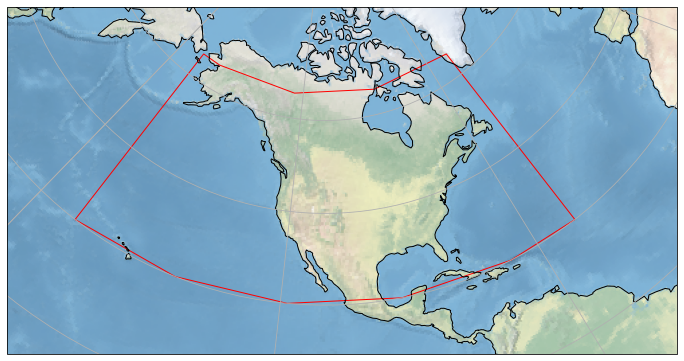

In [10]:
proj = ccrs.LambertConformal(central_longitude=-110.0, central_latitude=35.0)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection=proj)

ax.stock_img()
ax.add_patch(
    mpatches.Rectangle(xy=[-170, 20], width=120, height=45, facecolor='none',
                       edgecolor='red', transform=ccrs.PlateCarree()))
ax.set_extent([-180, -30, 10, 70], crs=ccrs.PlateCarree())
ax.gridlines()
ax.coastlines()

plt.show()

In [12]:
ds1_subset = ds1.sel(time='2015-11-16 00', level=500).metpy.parse_cf()
ds1_subset

<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 181)
Coordinates:
  * longitude  (longitude) float32 -170.0 -169.8 -169.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 20.5 20.25 20.0
    level      int32 500
    time       datetime64[ns] 2015-11-16
    metpy_crs  object Projection: latitude_longitude
Data variables:
    z          (latitude, longitude) float32 ...
    q          (latitude, longitude) float32 ...
    t          (latitude, longitude) float32 ...
    u          (latitude, longitude) float32 ...
    v          (latitude, longitude) float32 ...
    w          (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-13 23:03:08 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [13]:
z500 = mpcalc.geopotential_to_height(ds1_subset['z'])
u500 = ds1_subset['u']
v500 = ds1_subset['v']
av500 = mpcalc.absolute_vorticity(u500, v500)

In [15]:
av500.data.magnitude

array([[2.52798616e-04, 2.55255208e-04, 2.56090096e-04, ...,
        1.07781645e-04, 9.68798446e-05, 8.46228363e-05],
       [2.64521977e-04, 2.68024347e-04, 2.70052207e-04, ...,
        1.08713720e-04, 9.93544788e-05, 8.88182735e-05],
       [2.70102334e-04, 2.73810261e-04, 2.76241312e-04, ...,
        1.09979428e-04, 1.03898959e-04, 9.67975853e-05],
       ...,
       [3.64280947e-05, 3.61500391e-05, 3.49895271e-05, ...,
        2.47206779e-05, 2.63571161e-05, 2.80843804e-05],
       [3.33783973e-05, 3.46014804e-05, 3.50702484e-05, ...,
        2.46302857e-05, 2.69489052e-05, 2.96626307e-05],
       [3.09657411e-05, 3.26658187e-05, 3.43385309e-05, ...,
        2.49697235e-05, 2.80016901e-05, 3.15880285e-05]])

/home/disk/p/dlhogan/miniconda3/envs/metpy/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/disk/p/dlhogan/miniconda3/envs/metpy/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/disk/p/dlhogan/miniconda3/envs/metpy/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


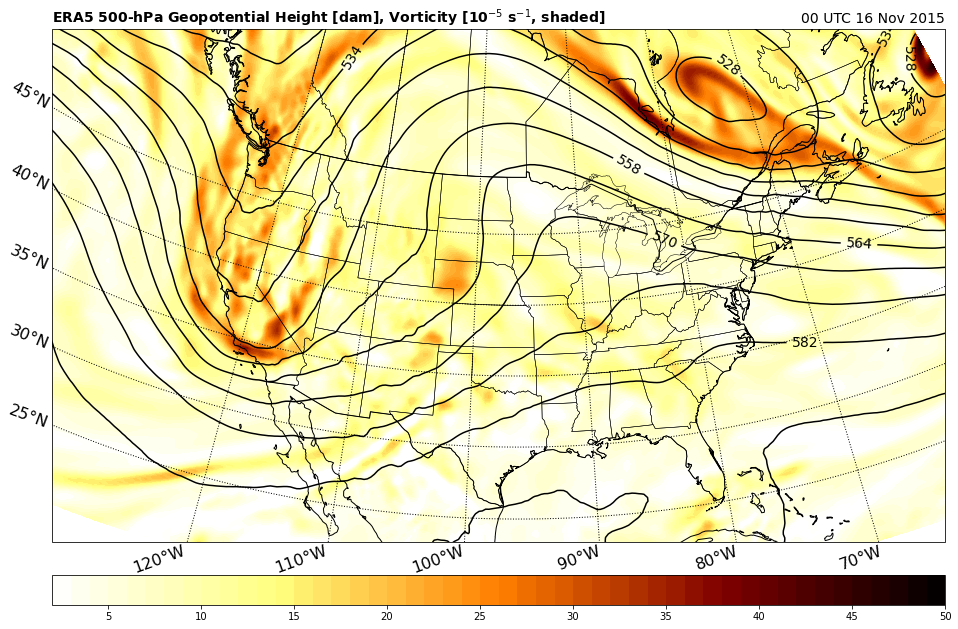

In [16]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130, -65, 20, 55])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=1, edgecolor='black')

plt1 = ax.contourf(
    av500['longitude'], av500['latitude'], 10.**5 * av500,
    levels=np.linspace(2, 50, 49), cmap='afmhot_r', transform=ccrs.PlateCarree())
plt2 = ax.contour(
    z500['longitude'], z500['latitude'], z500.data.to('decameter'),
    levels=np.linspace(480, 600, 21), colors='black', transform=ccrs.PlateCarree())
ax.clabel(plt2, np.linspace(480, 600, 21), inline=True, fmt='%d', fontsize=14)

cb = fig.colorbar(plt1, ax=ax, orientation='horizontal', pad=0.05, aspect=30)
cb.set_ticks(np.linspace(5, 50, 10))

dt = datetime.utcfromtimestamp(z500['time'].values.astype(int) * 1e-9)
ax.set_title(
    'ERA5 500-hPa Geopotential Height [dam], Vorticity [10$^{-5}$ s$^{-1}$, shaded]',
    fontweight='bold', fontsize=14, loc='left')
ax.set_title(datetime.strftime(dt, '%H UTC %d %b %Y'), fontsize=14, loc='right')

# # Format the gridlines (optional)
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True, dms=True, x_inline=False,
    y_inline=False, linewidth=1, color='black', linestyle=':')
gl.xlocator = mticker.FixedLocator([-120, -110, -100, -90, -80, -70])
gl.ylocator = mticker.FixedLocator([25, 30, 35, 40, 45])
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16, 'rotation': 20}
gl.ylabel_style = {'size': 16}


In [17]:
ds2 = xr.open_dataset(os.path.join(inpath,storm_folder,files[0]))
ds2

<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 181, time: 32)
Coordinates:
  * longitude  (longitude) float32 -170.0 -169.8 -169.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2015-11-16 ... 2015-11-19T21:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-13 23:17:03 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [20]:
ds2_subset = ds2.sel(time='2015-11-16 12').metpy.parse_cf()
ds2_subset

<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 181)
Coordinates:
  * longitude  (longitude) float32 -170.0 -169.8 -169.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 20.5 20.25 20.0
    time       datetime64[ns] 2015-11-16T12:00:00
    metpy_crs  object Projection: latitude_longitude
Data variables:
    u10        (latitude, longitude) float32 ...
    v10        (latitude, longitude) float32 ...
    d2m        (latitude, longitude) float32 ...
    t2m        (latitude, longitude) float32 ...
    msl        (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-13 23:17:03 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

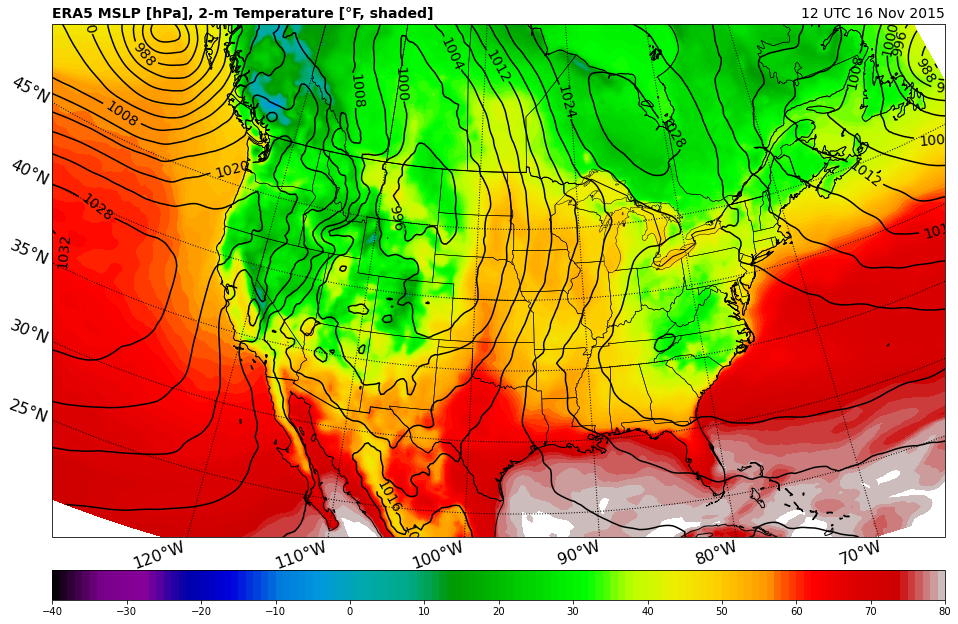

In [21]:
# Assign MSLP and 2-m temperature
mslp = ds2_subset['msl'].metpy.quantify()
t2m = ds2_subset['t2m'].metpy.quantify()

# Plotting commands
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130, -65, 20, 55])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=1, edgecolor='black')

plt1 = ax.contourf(
    t2m['longitude'], t2m['latitude'], t2m.data.to('degF'),
    levels=np.linspace(-40, 80, 121), cmap='nipy_spectral',
    transform=ccrs.PlateCarree())
plt2 = ax.contour(
    mslp['longitude'], mslp['latitude'], mslp.data.to('hPa'),
    levels=np.linspace(940, 1040, 26), colors='black', transform=ccrs.PlateCarree())
ax.clabel(plt2, np.linspace(940, 1040, 26), inline=True, fmt='%d', fontsize=14)

cb = fig.colorbar(plt1, ax=ax, orientation='horizontal', pad=0.05, aspect=30)
cb.set_ticks(np.linspace(-40, 80, 13))

dt = datetime.utcfromtimestamp(mslp['time'].values.astype(int) * 1e-9)
ax.set_title(
    'ERA5 MSLP [hPa], 2-m Temperature [\u00b0F, shaded]',
    fontweight='bold', fontsize=14, loc='left')
ax.set_title(datetime.strftime(dt, '%H UTC %d %b %Y'), fontsize=14, loc='right')

# # Format the gridlines (optional)
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True, dms=True, x_inline=False,
    y_inline=False, linewidth=1, color='k', linestyle=':')
gl.xlocator = mticker.FixedLocator([-120, -110, -100, -90, -80, -70])
gl.ylocator = mticker.FixedLocator([25, 30, 35, 40, 45])
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16, 'rotation': 20}
gl.ylabel_style = {'size': 16}

plt.show()

In [22]:
ds3 = xr.open_dataset(os.path.join(inpath,storm_folder,files[-1]))
ds3

<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 181, time: 32)
Coordinates:
  * longitude  (longitude) float32 -170.0 -169.8 -169.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2015-11-16 ... 2015-11-19T21:00:00
Data variables:
    pt         (time, latitude, longitude) float32 ...
    pres       (time, latitude, longitude) float32 ...
    z          (time, latitude, longitude) float32 ...
    u          (time, latitude, longitude) float32 ...
    v          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-29 05:53:39 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [23]:
ds3_subset = ds3.sel(time=np.datetime64('2015-11-16T12:00:00')).metpy.parse_cf()
ds3_subset

<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 181)
Coordinates:
  * longitude  (longitude) float32 -170.0 -169.8 -169.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 20.5 20.25 20.0
    time       datetime64[ns] 2015-11-16T12:00:00
    metpy_crs  object Projection: latitude_longitude
Data variables:
    pt         (latitude, longitude) float32 ...
    pres       (latitude, longitude) float32 ...
    z          (latitude, longitude) float32 ...
    u          (latitude, longitude) float32 ...
    v          (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-29 05:53:39 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

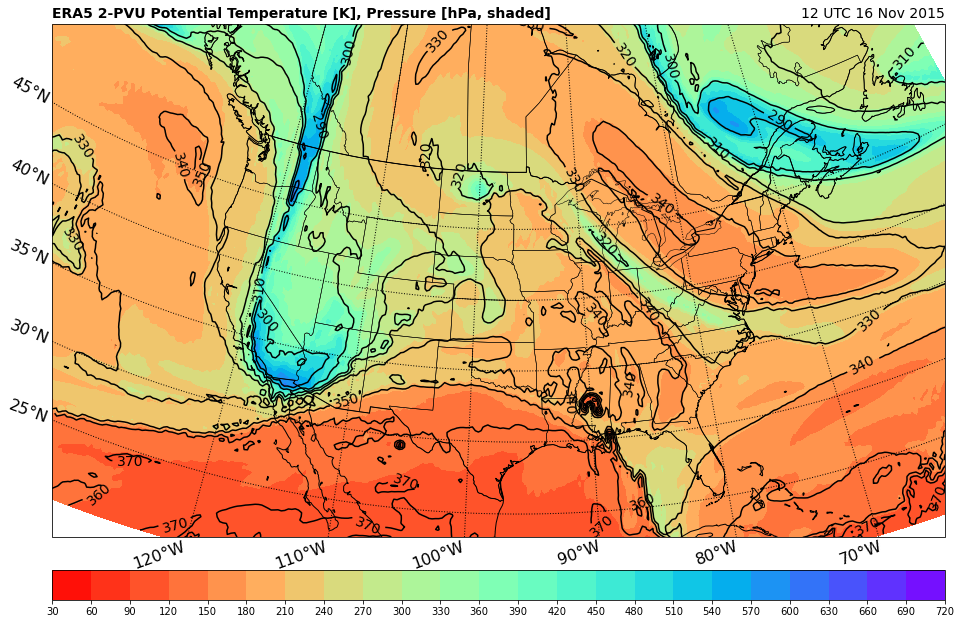

In [24]:
# Assign DT theta and pressure
pt2pvu = ds3_subset['pt'].metpy.quantify()
pres2pvu = ds3_subset['pres'].metpy.quantify()

# Plotting commands
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130, -65, 20, 55])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=1, edgecolor='black')

plt1 = ax.contourf(
    pres2pvu['longitude'], pres2pvu['latitude'], pres2pvu.data.to('hPa'),
    levels=np.linspace(30, 720, 24), cmap='rainbow_r',
    transform=ccrs.PlateCarree())
plt2 = ax.contour(
    pt2pvu['longitude'], pt2pvu['latitude'], pt2pvu,
    levels=np.linspace(250, 450, 21), colors='black', transform=ccrs.PlateCarree())
ax.clabel(plt2, np.linspace(250, 450, 21), inline=True, fmt='%d', fontsize=14)

cb = fig.colorbar(plt1, ax=ax, orientation='horizontal', pad=0.05, aspect=30)
cb.set_ticks(np.linspace(30, 720, 24))

dt = datetime.utcfromtimestamp(pt2pvu['time'].values.astype(int) * 1e-9)
ax.set_title(
    'ERA5 2-PVU Potential Temperature [K], Pressure [hPa, shaded]',
    fontweight='bold', fontsize=14, loc='left')
ax.set_title(datetime.strftime(dt, '%H UTC %d %b %Y'), fontsize=14, loc='right')

# # Format the gridlines (optional)
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True, dms=True, x_inline=False,
    y_inline=False, linewidth=1, color='k', linestyle=':')
gl.xlocator = mticker.FixedLocator([-120, -110, -100, -90, -80, -70])
gl.ylocator = mticker.FixedLocator([25, 30, 35, 40, 45])
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16, 'rotation': 20}
gl.ylabel_style = {'size': 16}

plt.show()